In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
edges_df = pd.read_csv('edges.csv')
edges_df.columns = edges_df.columns.str.strip().str.lstrip('#').str.strip()  # remove whitespace and '#'

G = nx.from_pandas_edgelist(edges_df, source='source', target='target', create_using=nx.DiGraph)

nodes_df = pd.read_csv('nodes.csv')
print(nodes_df.columns)

Index(['# index', ' label', ' source', ' value', ' _pos'], dtype='object')


In [ ]:
nodes_df.columns = nodes_df.columns.str.strip().str.lstrip('#').str.strip()

print(nodes_df.columns)

attributes = nodes_df.set_index('index')['value'].to_dict()
nx.set_node_attributes(G, attributes, 'label')


Index(['index', 'label', 'source', 'value', '_pos'], dtype='object')


In [ ]:
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph has 1224 nodes and 19025 edges.


In [ ]:
# PageRank (good for directed networks)
pagerank = nx.pagerank(G, alpha=0.85)

# In-degree centrality (number of incoming links)
indegree_centrality = nx.in_degree_centrality(G)

# HITS algorithm (authority and hub scores)
hubs, authorities = nx.hits(G)


In [ ]:
# Top 10 by PageRank
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 blogs by PageRank:")
for node, score in top_pagerank:
    print(f"Blog {node} - PageRank: {score:.4f}")

Top 10 blogs by PageRank:
Blog 154 - PageRank: 0.0188
Blog 54 - PageRank: 0.0160
Blog 1050 - PageRank: 0.0133
Blog 854 - PageRank: 0.0131
Blog 640 - PageRank: 0.0131
Blog 1152 - PageRank: 0.0115
Blog 962 - PageRank: 0.0113
Blog 728 - PageRank: 0.0111
Blog 1244 - PageRank: 0.0094
Blog 797 - PageRank: 0.0091


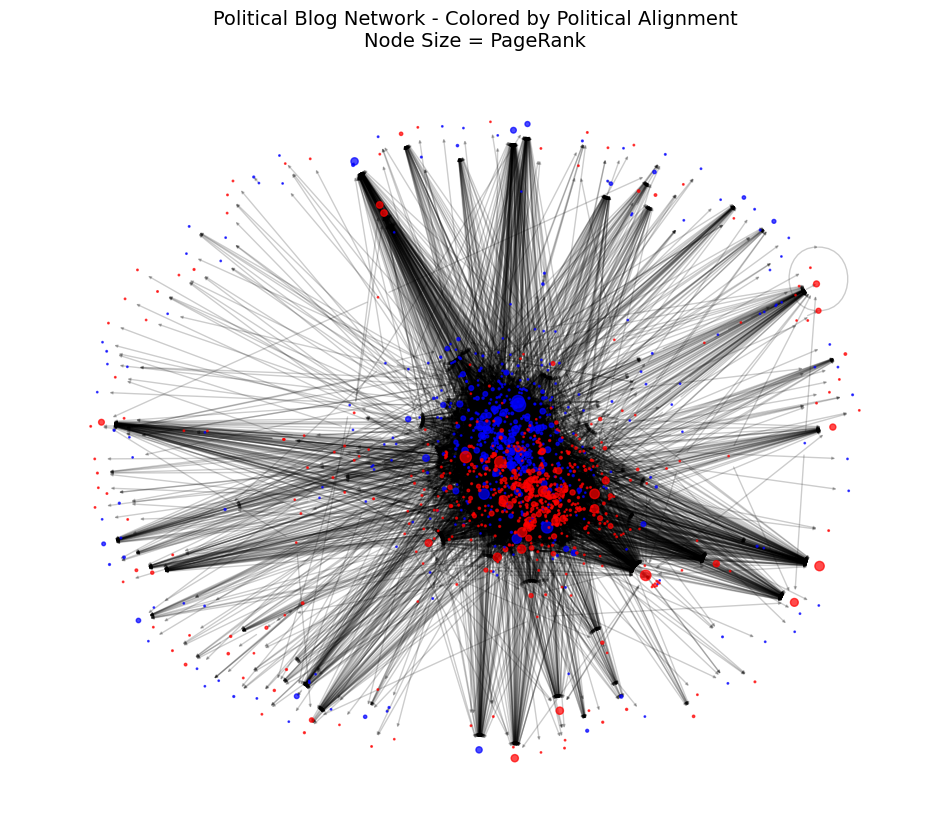

In [ ]:
import matplotlib.pyplot as plt

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Color nodes by label
colors = ['blue' if G.nodes[n].get('label') == 0 else 'red' for n in G.nodes]

# Size nodes by PageRank score
sizes = [pagerank[n] * 5000 for n in G.nodes]

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2, arrowsize=4)
plt.title("Political Blog Network - Colored by Political Alignment\nNode Size = PageRank", fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
import community as community_louvain

G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)

# Assign partition to node attribute
nx.set_node_attributes(G_undirected, partition, 'community')


In [ ]:
import pandas as pd

# Save top 10 PageRank blogs
top_df = pd.DataFrame(top_pagerank, columns=['node', 'pagerank'])
top_df.to_csv("top_opinion_leaders.csv", index=False)
